### Vorauswahlverfahren (Keyword / Semantic Search)

In [1]:
res = catalog.load('test_results')

2022-06-10 13:53:26,642 - kedro.io.data_catalog - INFO - Loading data from `test_results` (CSVDataSet)...


In [2]:
res.head()

,2204,2203,2202,2201,2200,2199,2198,2197,2196,2195,...,10,9,8,7,6,5,4,3,2,1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.800,0.790,0.780,0.770,0.760,0.750,0.690,0.590,0.570,0.430
1,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,...,0.980,0.978,0.977,0.975,0.973,0.965,0.957,0.948,0.932,0.872
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.310,0.310,0.310,0.300,0.300,0.280,0.270,0.250,0.190,0.110
3,0.714,0.714,0.714,0.714,0.714,0.714,0.714,0.714,0.714,0.714,...,0.498,0.491,0.478,0.464,0.453,0.433,0.414,0.389,0.373,0.359


In [3]:
# reverse column order and drop labels
dataset = res['dataset'].tolist()
_res = res[res.columns[::-1]].drop(columns=['dataset'])
dataset

['keyword:ecu_test_doku',
 'keyword:germanquad',
 'semantic:ecu_test_doku',
 'semantic:germanquad']

In [4]:
# replace nas
# _res = _res.fillna(0)
_res.head(5)

,1,2,3,4,5,6,7,8,9,10,...,2195,2196,2197,2198,2199,2200,2201,2202,2203,2204
0,0.430,0.570,0.590,0.690,0.750,0.760,0.770,0.780,0.790,0.800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.872,0.932,0.948,0.957,0.965,0.973,0.975,0.977,0.978,0.980,...,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994
2,0.110,0.190,0.250,0.270,0.280,0.300,0.300,0.310,0.310,0.310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.359,0.373,0.389,0.414,0.433,0.453,0.464,0.478,0.491,0.498,...,0.714,0.714,0.714,0.714,0.714,0.714,0.714,0.714,0.714,0.714


In [5]:
# transpose
_res = _res.transpose()

In [6]:
# label columns
_res.columns = dataset
_res.head()

,keyword:ecu_test_doku,keyword:germanquad,semantic:ecu_test_doku,semantic:germanquad
1,0.43,0.872,0.11,0.359
2,0.57,0.932,0.19,0.373
3,0.59,0.948,0.25,0.389
4,0.69,0.957,0.27,0.414
5,0.75,0.965,0.28,0.433


### TOP-k Score

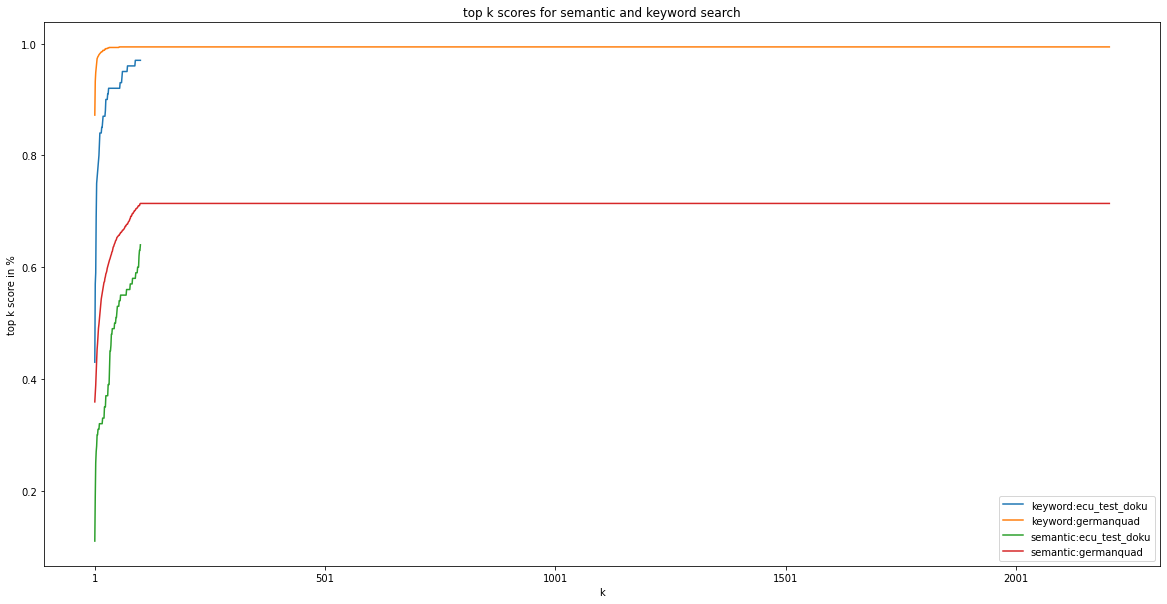

In [13]:
_ = _res.plot(figsize=(20, 10), title='top k scores for semantic and keyword search', 
          xlabel='k', ylabel='top k score in %')

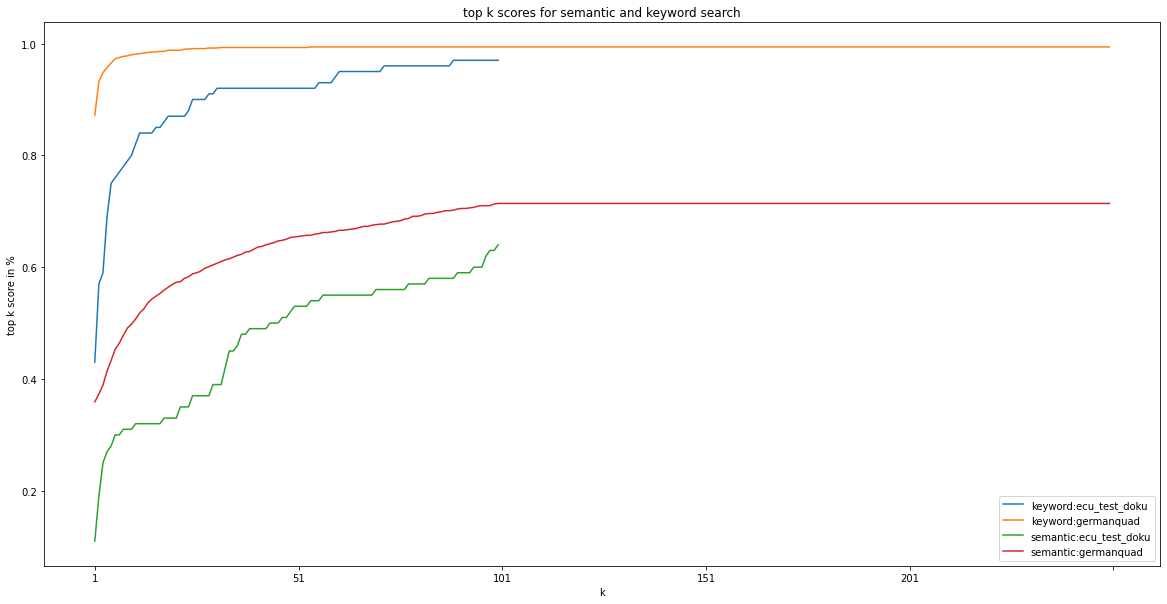

In [12]:
_ = _res[:250].plot(figsize=(20, 10), title='top k scores for semantic and keyword search', 
          xlabel='k', ylabel='top k score in %')

### BERT

In [2]:
res = catalog.load('bert_results')

2022-06-13 10:59:14,730 - kedro.io.data_catalog - INFO - Loading data from `bert_results` (CSVDataSet)...


In [3]:
res.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,0.31,0.46,0.58,0.6,0.65,0.68,0.7,0.73,0.74,0.76,...,0.87,0.87,0.87,0.87,0.87,0.87,0.87,0.87,0.87,0.87


In [6]:
# transpose
_res = res.transpose()

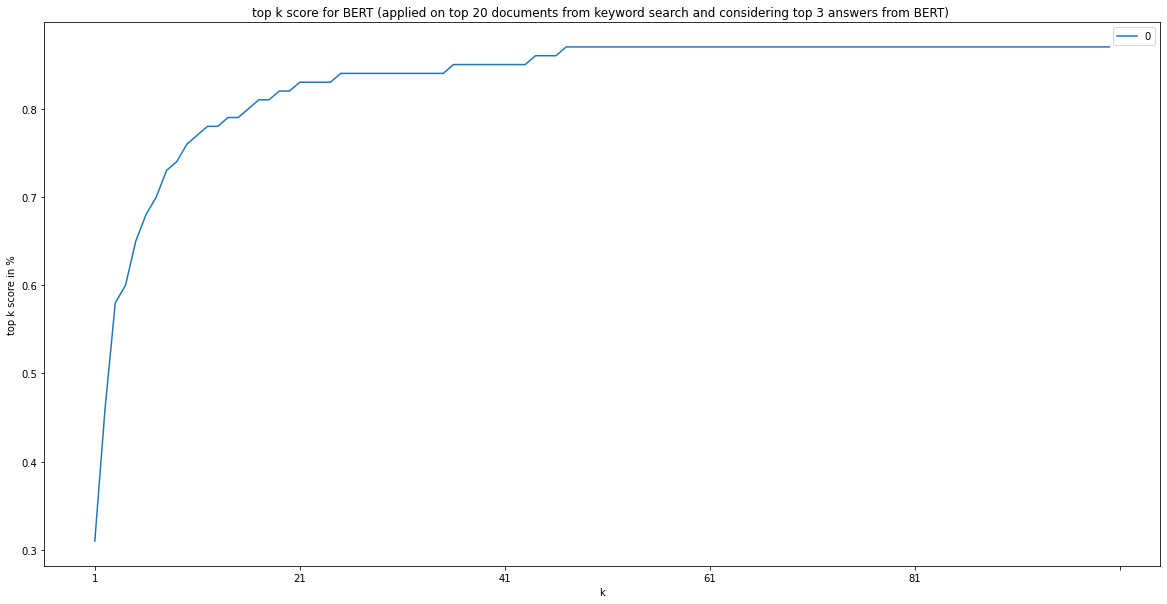

In [10]:
_ = _res.plot(figsize=(20, 10), title='top k score for BERT (applied on top 20 documents from keyword search and considering top 3 answers from BERT) ', 
          xlabel='k', ylabel='top k score in %')